In [4]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import plotly.offline
import plotly.express as px
import plotly.graph_objects as go
import plotly.subplots
import squarify
plt.rcParams["font.sans-serif"]='Microsoft JhengHei'
df=pd.read_csv('python2011nsc.csv')
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 530 entries, 0 to 529
Data columns (total 43 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   NO           530 non-null    int64  
 1   Gender       530 non-null    int64  
 2   DateOfBirth  530 non-null    int64  
 3   Race         530 non-null    int64  
 4   FaEdu        530 non-null    int64  
 5   MomEdu       530 non-null    int64  
 6   FaexpEdu     530 non-null    int64  
 7   CoexpEdu     530 non-null    int64  
 8   Income       530 non-null    int64  
 9   Grade        530 non-null    float64
 10  Level        530 non-null    int64  
 11  Sportyear    530 non-null    float64
 12  ExpectEdu    530 non-null    int64  
 13  a1           530 non-null    int64  
 14  a2           530 non-null    int64  
 15  a3           530 non-null    int64  
 16  a4           530 non-null    int64  
 17  a5           530 non-null    int64  
 18  a6           530 non-null    int64  
 19  a7      

In [8]:
print(df[['pl','al']].describe())

               pl          al
count  530.000000  530.000000
mean     3.947799    3.249528
std      0.675431    0.572590
min      2.000000    1.250000
25%      3.666667    3.000000
50%      4.000000    3.250000
75%      4.333333    3.500000
max      5.000000    5.000000


In [12]:
# 單一樣本t檢定
from scipy import stats
print("mean=",df['Grade'].mean(),"std=",df['Grade'].std())
stats.ttest_1samp(df['Grade'],70)

mean= 65.79283018867925 std= 14.354128573262944


Ttest_1sampResult(statistic=-6.74762819609411, pvalue=3.955441706945321e-11)

In [16]:
# Levene同質性檢定
import scipy.stats as stats
stats.levene(df['pl'][df['Gender']==1],
            df['pl'][df['Gender']==0],
             center='mean')

LeveneResult(statistic=1.210843553260565, pvalue=0.2716665405781743)

In [19]:
# 獨立樣本t檢定
group1=df['pl'][df['Gender']==1]
group2=df['pl'][df['Gender']==0]
print("man count=",group1.count(),"man mean=",group1.mean(),"man std=",group1.std())
print("female count=",group2.count(),"female mean=",group2.mean(),"female std=",group2.std())
stats.ttest_ind(group1,group2,equal_var=True)

man count= 389 man mean= 3.9931448157789204 man std= 0.6579837202340685
female count= 141 female mean= 3.822695035489361 female std= 0.7088479267906959


Ttest_indResult(statistic=2.5809127413833, pvalue=0.010122649096104946)

In [21]:
import researchpy as rp
rp.ttest(group1=df['pl'][df['Gender']==1],group1_name='Male',
        group2=df['pl'][df['Gender']==0],group2_name='Female')

(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0      Male  389.0  3.993145  0.657984  0.033361   3.927554  4.058736
 1    Female  141.0  3.822695  0.708848  0.059696   3.704673  3.940717
 2  combined  530.0  3.947799  0.675431  0.029339   3.890164  4.005434,
               Independent t-test   results
 0  Difference (Male - Female) =     0.1704
 1          Degrees of freedom =   528.0000
 2                           t =     2.5809
 3       Two side test p value =     0.0101
 4      Difference < 0 p value =     0.9949
 5      Difference > 0 p value =     0.0051
 6                   Cohen's d =     0.2537
 7                   Hedge's g =     0.2533
 8               Glass's delta =     0.2590
 9                 Pearson's r =     0.1116)

In [22]:
df1=pd.read_csv('TPRMOE2018.csv')
print(df1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   No               38 non-null     int64  
 1   feedback         38 non-null     int64  
 2   gender           38 non-null     int64  
 3   age              38 non-null     int64  
 4   sportyear        38 non-null     int64  
 5   cohnesion1       38 non-null     float64
 6   cohnesion2       38 non-null     float64
 7   cohnesion3       38 non-null     float64
 8   b1time           38 non-null     float64
 9   b2time           38 non-null     float64
 10  b3time           38 non-null     float64
 11  b1emotion        38 non-null     float64
 12  b2emotion        38 non-null     float64
 13  b3emotion        38 non-null     float64
 14  b1achieve        38 non-null     float64
 15  b2achieve        38 non-null     float64
 16  b3achieve        38 non-null     float64
 17  b1social         3

In [24]:
from scipy.stats import ttest_rel
co1=df1['cohnesion1']
co2=df1['cohnesion2']
print(co1.mean(),co2.mean())
print(co1.std(),co2.std())
ttest_rel(co1,co2)

3.704678362684211 4.374269005842106
0.40949386941206883 0.5819100627657381


Ttest_relResult(statistic=-7.4540621318776425, pvalue=7.0995205987043664e-09)

In [39]:
# 獨立樣本t檢定
df=pd.read_csv('python2011nsc.csv')
group1=df['achievement'][df['Gender']==1]
group2=df['achievement'][df['Gender']==0]
print("man count=",group1.count(),"man mean=",group1.mean(),"man std=",group1.std())
print("female count=",group2.count(),"female mean=",group2.mean(),"female std=",group2.std())
t_stat, p_val = stats.ttest_ind(group1, group2, equal_var=True)

if p_val < 0.05:
    print("The difference in means is statistically significant.")


man count= 389 man mean= 2.8097686375424162 man std= 0.6889127498110785
female count= 141 female mean= 2.5602836879432624 female std= 0.6252861553900682
The difference in means is statistically significant.


In [42]:
from sklearn.datasets import load_iris
iris=load_iris()
#輸入特徵
X=iris.data
#輸出特徵
y=iris.target
df_data=pd.DataFrame(data=np.c_[iris['data'],iris['target']],
                    columns=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm','Species'])
df_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


<function matplotlib.pyplot.show(close=None, block=None)>

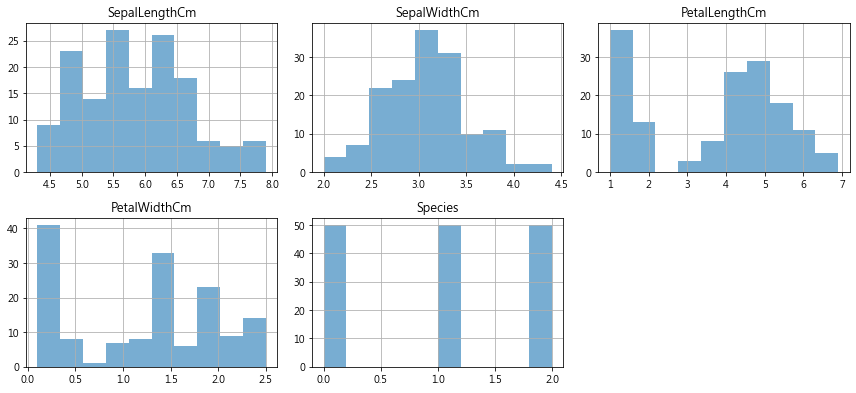

In [47]:
# 直方圖histograms
df_data.hist(alpha=0.6,layout=(3,3),figsize=(12,8),bins=10)
plt.tight_layout()
plt.show

<AxesSubplot:xlabel='PetalWidthCm', ylabel='Count'>

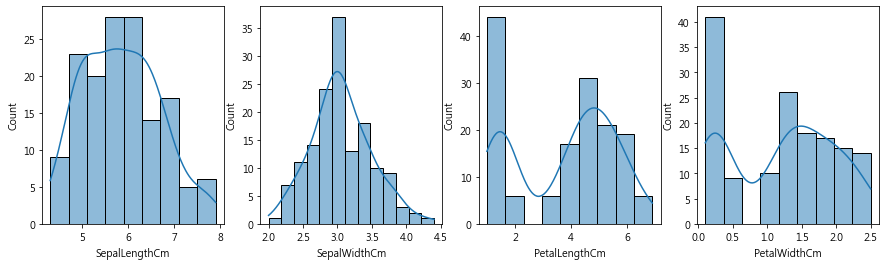

In [49]:
fig,axes=plt.subplots(nrows=1,ncols=4)
fig.set_size_inches(15,4)
sns.histplot(df_data["SepalLengthCm"][:],ax=axes[0],kde=True)
sns.histplot(df_data["SepalWidthCm"][:],ax=axes[1],kde=True)
sns.histplot(df_data["PetalLengthCm"][:],ax=axes[2],kde=True)
sns.histplot(df_data["PetalWidthCm"][:],ax=axes[3],kde=True)

array([[<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalLengthCm'>,
        <AxesSubplot:xlabel='Species', ylabel='SepalLengthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='SepalWidthCm'>,
        <AxesSubplot:xlabel='Species', ylabel='SepalWidthCm'>],
       [<AxesSubplot:xlabel='SepalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='SepalWidthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalLengthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='PetalWidthCm', ylabel='PetalLengthCm'>,
        <AxesSubplot:xlabel='Species', yl

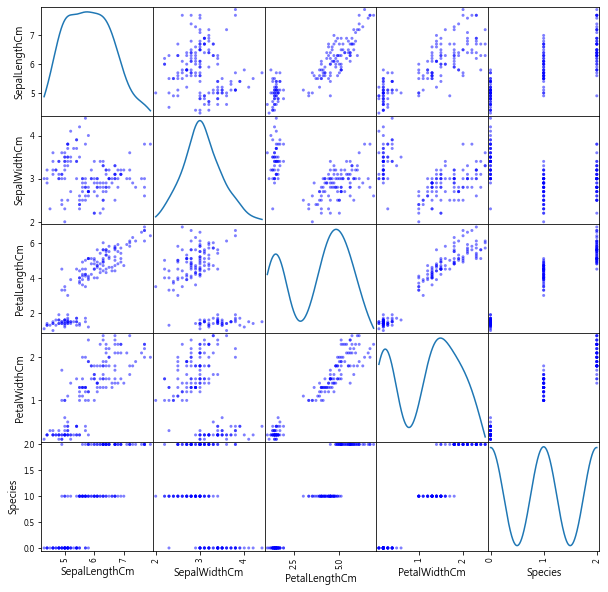

In [50]:
# Use Pandas
from pandas.plotting import scatter_matrix
scatter_matrix(df_data,figsize=(10,10),color="b",diagonal='kde')

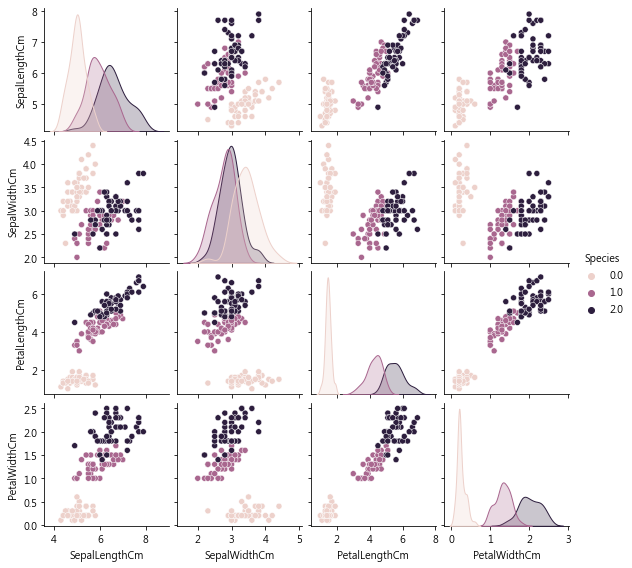

In [52]:
# Use Seaborn
sns.pairplot(df_data,hue="Species",height=2,diag_kind="kde")

C:\Users\ching\Anaconda2\envs\firstEnv\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning:

Glyph 8722 missing from current font.

C:\Users\ching\Anaconda2\envs\firstEnv\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning:

Glyph 8722 missing from current font.



<AxesSubplot:>

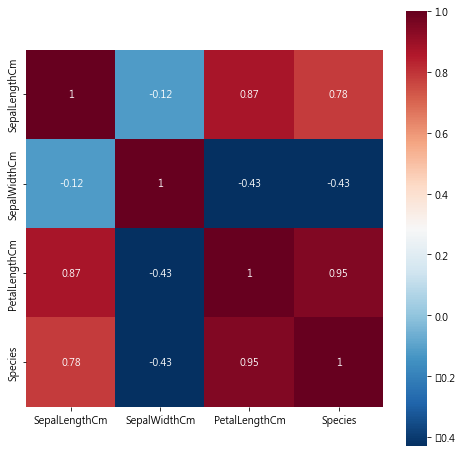

In [53]:
# correlation計算
corr=df_data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','Species']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr,square=True,annot=True,cmap="RdBu_r")

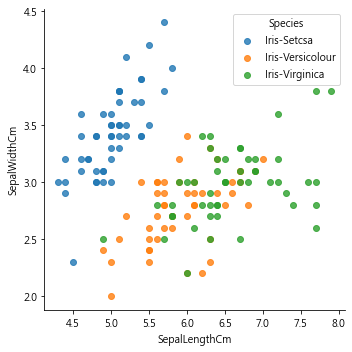

In [56]:
sns.lmplot('SepalLengthCm','SepalWidthCm',hue='Species',data=df_data,fit_reg=False,legend=False)
plt.legend(title='Species',loc='upper right',labels=['Iris-Setcsa','Iris-Versicolour','Iris-Virginica'])

In [2]:
import seaborn as sns
titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
# Creating the interactive dashboard
from ipywidgets import interact
# 定義一個函數，將繪製所選列分組的平均票價長條圖
@interact
# 使用 seaborn 創建長條圖，其中 x 為所選列， y 為票價
def create_fare_plot(col=titanic.drop(['fare','age'],axis=1).columns):
    sns.barplot(data=titanic,x=col,y='survived')
    # 使用所選列添加標題
    plt.title(f'Mean Bar Plot of the Fare grouped by the(col)')

interactive(children=(Dropdown(description='col', options=('survived', 'pclass', 'sex', 'sibsp', 'parch', 'emb…